In [1]:
import os
import tarfile
from six.moves import urllib

In [6]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()


In [7]:
import pandas as pd


In [8]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)


In [10]:
fetch_housing_data()

In [16]:
housing = load_housing_data()
housing.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [13]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [29]:
housing["ocean_proximity"].value_counts()


<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt

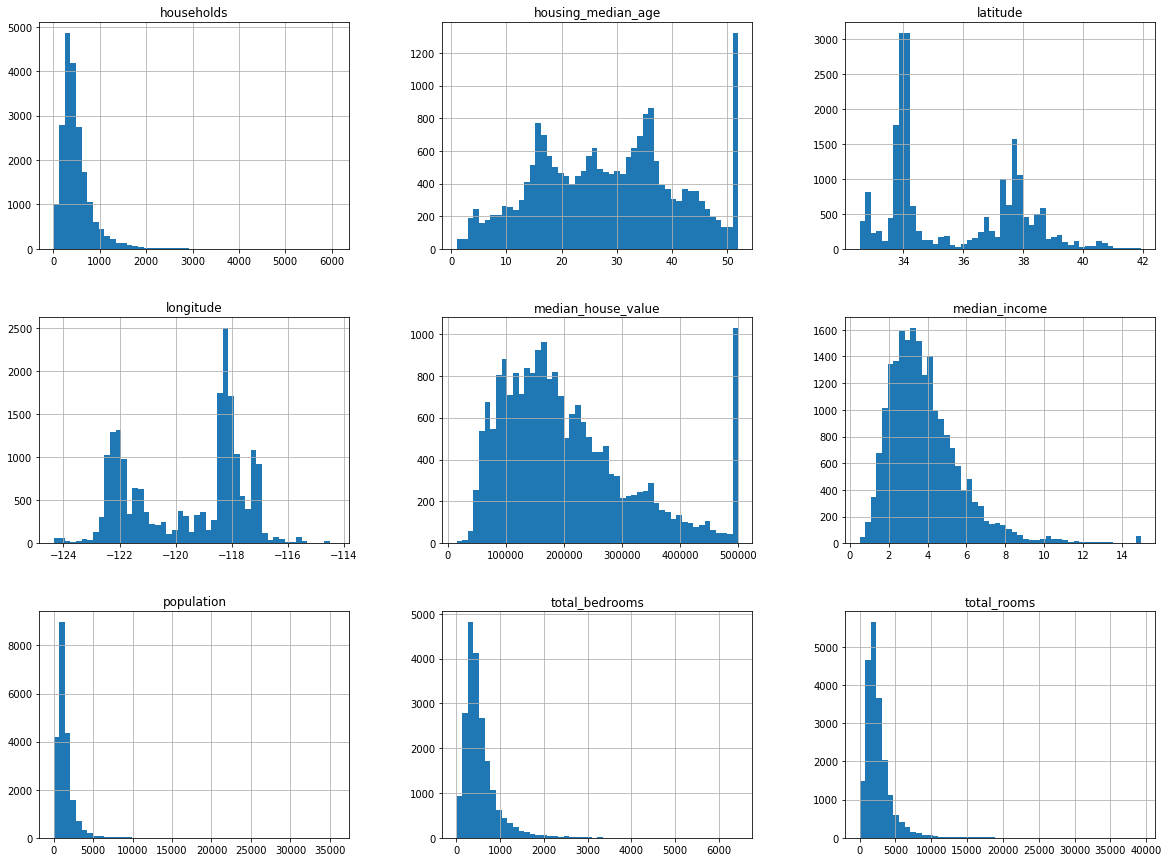

In [31]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [32]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


In [39]:
train_set, test_set = split_train_test(housing, 0.2)
print(str(len(train_set))+ " train +" + str(len(test_set))+ " test)")

16512 train +4128 test)


In [41]:
import hashlib

def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio
def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [42]:
housing_with_id = housing.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [43]:
train_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
6,6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY


In [44]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [51]:
housing['income_cat'] = np.ceil(housing['median_income']/1.5)
housing['income_cat'].value_counts()

3.0     7236
2.0     6581
4.0     3639
5.0     1423
1.0      822
6.0      532
7.0      189
8.0      105
9.0       50
11.0      49
10.0      14
Name: income_cat, dtype: int64

In [53]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [54]:
split

StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=0.2,
            train_size=None)

In [55]:
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    

In [56]:
housing['income_cat'].value_counts()/len(housing)

3.0     0.350581
2.0     0.318847
4.0     0.176308
5.0     0.068944
1.0     0.039826
6.0     0.025775
7.0     0.009157
8.0     0.005087
9.0     0.002422
11.0    0.002374
10.0    0.000678
Name: income_cat, dtype: float64

In [57]:
for set in (strat_train_set, strat_test_set):
    set.drop(['income_cat'], axis=1, inplace=True)

In [58]:
housing = strat_train_set.copy()

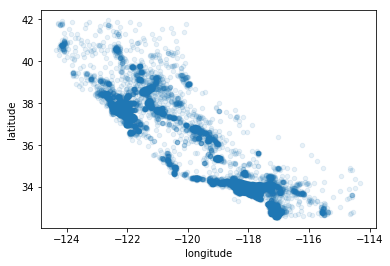

In [60]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

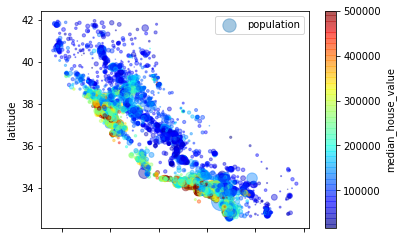

In [67]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, s=housing['population']/100, label='population',
            c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)

In [68]:
corr_matrix = housing.corr()

In [69]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924515,-0.109796,0.048963,0.075583,0.107149,0.061549,-0.015589,-0.045056
latitude,-0.924515,1.000000,0.009864,-0.039721,-0.071816,-0.115095,-0.076752,-0.078979,-0.144684
housing_median_age,-0.109796,0.009864,1.000000,-0.363195,-0.324448,-0.297841,-0.305708,-0.116608,0.111770
total_rooms,0.048963,-0.039721,-0.363195,1.000000,0.928874,0.855803,0.917204,0.203718,0.135989
total_bedrooms,0.075583,-0.071816,-0.324448,0.928874,1.000000,0.876225,0.979599,-0.005800,0.049177
population,0.107149,-0.115095,-0.297841,0.855803,0.876225,1.000000,0.905172,0.007472,-0.024765
households,0.061549,-0.076752,-0.305708,0.917204,0.979599,0.905172,1.000000,0.014929,0.065841
median_income,-0.015589,-0.078979,-0.116608,0.203718,-0.005800,0.007472,0.014929,1.000000,0.687474
median_house_value,-0.045056,-0.144684,0.111770,0.135989,0.049177,-0.024765,0.065841,0.687474,1.000000


In [70]:
from pandas.tools.plotting import scatter_matrix

/Users/yudonglu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1d9d2828>,
      dtype=object)

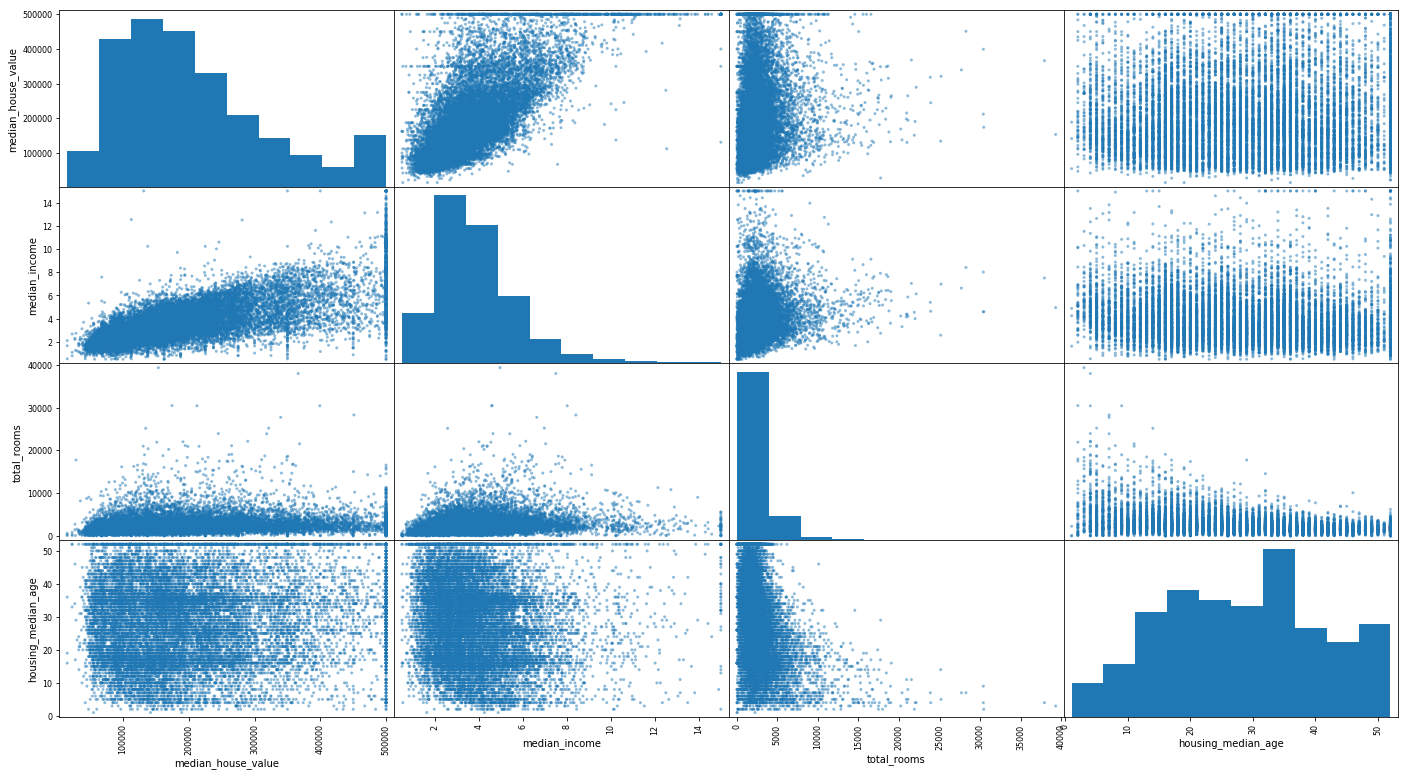

In [73]:
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(24,13))

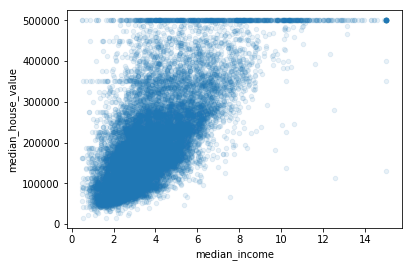

In [74]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)

In [75]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']


In [79]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687474
rooms_per_household         0.145750
total_rooms                 0.135989
housing_median_age          0.111770
households                  0.065841
total_bedrooms              0.049177
population_per_household   -0.021844
population                 -0.024765
longitude                  -0.045056
latitude                   -0.144684
bedrooms_per_room          -0.259679
Name: median_house_value, dtype: float64

In [80]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [81]:

median = housing['total_bedrooms'].median()
housing['total_bedrooms'].fillna(median)


17606     351.0
15698      96.0
14650     471.0
3230      371.0
3555     1525.0
19480     588.0
9026      244.0
13685     293.0
4937      465.0
4861      229.0
16365     951.0
19684     559.0
20330     502.0
13956     582.0
2390      495.0
11176     649.0
15614     545.0
2953      251.0
13209     409.0
6569      261.0
5825      913.0
18116     328.0
16718     945.0
13600     278.0
13989     444.0
15168     190.0
6747      563.0
7398      366.0
5562      133.0
16121     416.0
          ...  
12380     767.0
5618       24.0
10060     539.0
494       474.0
4471      797.0
19786     300.0
9969      393.0
14621    1051.0
579       302.0
11682    1615.0
245       460.0
12130     537.0
16441     544.0
17108     501.0
19934     422.0
1364       34.0
1236      829.0
5364      272.0
15500     407.0
8754       15.0
15270     515.0
3754      373.0
12166     756.0
12430    1222.0
7364      212.0
6563      236.0
12053     294.0
13908     872.0
11159     380.0
15775     682.0
Name: total_bedrooms, Le

In [82]:
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy='median')
housing_num = housing.drop('ocean_proximity', axis=1)
imputer.fit(housing_num)

/Users/yudonglu/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [83]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2122.    ,  434.    , 1166.    ,
        408.    ,    3.5409])

In [84]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2122.    ,  434.    , 1166.    ,
        408.    ,    3.5409])

In [85]:
x = imputer.transform(housing_num)

In [86]:
x


array([[-121.89  ,   37.29  ,   38.    , ...,  710.    ,  339.    ,
           2.7042],
       [-122.46  ,   37.79  ,   52.    , ...,  304.    ,  110.    ,
          14.2959],
       [-117.2   ,   32.77  ,   31.    , ...,  936.    ,  462.    ,
           2.8621],
       ...,
       [-116.4   ,   34.09  ,    9.    , ..., 2098.    ,  765.    ,
           3.2723],
       [-118.01  ,   33.82  ,   31.    , ..., 1356.    ,  356.    ,
           4.0625],
       [-122.45  ,   37.77  ,   52.    , ..., 1269.    ,  639.    ,
           3.575 ]])

In [88]:
housing_tr = pd.DataFrame(x, columns=housing_num.columns)

In [89]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
1,-122.46,37.79,52.0,899.0,96.0,304.0,110.0,14.2959
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
5,-120.97,37.66,24.0,2930.0,588.0,1448.0,570.0,3.5395
6,-118.86,34.07,16.0,1409.0,244.0,970.0,172.0,8.0144
7,-117.24,34.15,26.0,2041.0,293.0,936.0,375.0,6.0000
8,-118.26,33.99,47.0,1865.0,465.0,1916.0,438.0,1.8242
9,-118.28,34.02,29.0,515.0,229.0,2690.0,217.0,0.4999


In [90]:
from sklearn.preprocessing import LabelEncoder

In [91]:
encoder = LabelEncoder()
housing_cat = housing['ocean_proximity']
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([0, 3, 4, ..., 1, 0, 3])

In [92]:
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [93]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

/Users/yudonglu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [94]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [95]:
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

In [121]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, x, y=None):
        return self
    def transform(self, x, y=None):
        rooms_per_household =x[:,rooms_ix]/x[:, household_ix]
        population_per_household = x[:, population_ix]/x[:,household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = x[:, bedrooms_ix]/x[:, rooms_ix]
            return np.c_[x, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[x, rooms_per_household, population_per_household]
        
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [122]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [133]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler
num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']


num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])
full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared.shape

/Users/yudonglu/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


(16512, 16)

In [134]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [135]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print('predictions:' +str(lin_reg.predict(some_data_prepared)))

predictions:[209300.18149413 661078.1135578  210913.91718561  57466.84542129
 186707.41879655]


In [138]:
print('labels:'+str(list(some_labels)))

labels:[286600.0, 500001.0, 196900.0, 46300.0, 254500.0]


In [140]:
from sklearn.metrics import mean_squared_error

housing_prediction = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_prediction)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68321.70513040475

In [141]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [142]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
rmse_scores = np.sqrt(-scores).mean()

In [144]:
rmse_scores.mean()

70497.88429862689

In [145]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

In [147]:
lin_rmse_scores, lin_rmse_scores.mean()


(array([66614.9761906 , 66150.38653105, 67344.60010664, 74470.89010773,
        71434.35592111, 69791.47991185, 65376.52916665, 67643.17772272,
        69655.23105926, 67378.82020947]), 68586.04469270926)

In [148]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)

/Users/yudonglu/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/yudonglu/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/yudonglu/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/yudonglu/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/yudonglu/anaconda3/lib/py

In [153]:
forest_reg.fit(housing_prepared, housing_labels)

/Users/yudonglu/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [154]:
from sklearn.externals import joblib
joblib.dump(forest_reg, 'my_model.pkl')
my_model = joblib.load('my_model.pkl')

In [158]:
%%time
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators': [3, 10, 30,40,50], 'max_features': [2,4,6,8]},
             {'bootstrap': [False], 'n_estimators': [3,10], 'max_features':[2,3,4]}]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)

CPU times: user 2min 9s, sys: 2.36 s, total: 2min 11s
Wall time: 2min 12s


In [159]:
print(grid_search.best_params_)

{'max_features': 6, 'n_estimators': 40}


In [160]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=40, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [163]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

64905.45696096095 {'max_features': 2, 'n_estimators': 3}
55744.14377847341 {'max_features': 2, 'n_estimators': 10}
53097.94176237669 {'max_features': 2, 'n_estimators': 30}
52454.047605118285 {'max_features': 2, 'n_estimators': 40}
52840.871780172456 {'max_features': 2, 'n_estimators': 50}
60587.200193791316 {'max_features': 4, 'n_estimators': 3}
53090.34129420127 {'max_features': 4, 'n_estimators': 10}
50506.535069059566 {'max_features': 4, 'n_estimators': 30}
50486.49813188631 {'max_features': 4, 'n_estimators': 40}
50464.70169370521 {'max_features': 4, 'n_estimators': 50}
59608.883027686585 {'max_features': 6, 'n_estimators': 3}
51928.13488345824 {'max_features': 6, 'n_estimators': 10}
50339.930629886054 {'max_features': 6, 'n_estimators': 30}
49750.0076130489 {'max_features': 6, 'n_estimators': 40}
49775.083041237405 {'max_features': 6, 'n_estimators': 50}
58094.56898829039 {'max_features': 8, 'n_estimators': 3}
52023.261168899175 {'max_features': 8, 'n_estimators': 10}
50168.58703

In [168]:
final_model = grid_search.best_estimator_

x_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()

x_test_prepared = full_pipeline.transform(x_test)

In [171]:
final_predictions = final_model.predict(x_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [172]:
final_rmse

47341.50747059693

In [182]:
#{'n_estimators': [3, 10, 30,40,50], 'max_features': [2,4,6,8]},
#{'bootstrap': [False], 'n_estimators': [3,10], 'max_features':[2,3,4]}


from bayes_opt import BayesianOptimization
def bay_Opt_reg(n_est, max_f):
    forest_reg = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=int(max_f), max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=int(n_est), n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)
    scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
    rmse_scores = np.sqrt(-scores).mean()
    return -rmse_scores

In [ ]:
bay_Opt_reg(40,6)

-49744.98817313074

In [ ]:
from bayes_opt import BayesianOptimization
BayesOpt = BayesianOptimization(bay_Opt_reg, {'n_est' : (3,60),
                                            'max_f' : (1,8)})
gp_params = {"alpha": 1e-5}
BayesOpt.maximize(init_points=10, n_iter=50, acq='ucb', kappa=5, **gp_params)

print('BayesOpt {}'.format(BayesOpt.res['max']['max_val']))


Initialization
-----------------------------------------------------
 Step |   Time |      Value |     max_f |     n_est | 
    1 | 00m09s | -52461.74645 |    2.6554 |   39.8634 | 
    2 | 00m25s | -49391.10744 |    6.4807 |   46.1092 | 
    3 | 00m18s | -49480.26111 |    7.9922 |   30.0622 | 
    4 | 00m03s | -54416.41449 |    2.9115 |   13.9940 | 
    5 | 00m07s | -54964.70103 |    1.6335 |   42.7086 | 
    6 | 00m24s | -49258.16786 |    6.4680 |   45.5388 | 
    7 | 00m20s | -49870.76958 |    4.2624 |   50.7167 | 
    8 | 00m38s | -49174.22755 |    7.2130 |   59.8895 | 
    9 | 00m28s | -49444.86218 |    7.8606 |   45.1288 | 
   10 | 00m24s | -49488.15094 |    5.3957 |   52.0322 | 


/Users/yudonglu/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:480: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([1598.19004618]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 55, 'nit': 6, 'warnflag': 2}
  ConvergenceWarning)


Bayesian Optimization
-----------------------------------------------------
 Step |   Time |      Value |     max_f |     n_est | 
   11 | 00m02s | -58081.74772 |    8.0000 |    3.0000 | 
   12 | 00m11s | -54599.45436 |    1.0000 |   60.0000 | 
   13 | 00m05s | -55168.23971 |    1.0000 |   25.4425 | 
   14 | 00m26s | -49895.07487 |    8.0000 |   36.9947 | 
